Scikit learn pratice

In [95]:
import pandas as pd

In [96]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
                'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(r'C:\Users\Tibi\Desktop\notebooks\boston housing\housing.csv',
                 header=None, delimiter=r"\s+", names=column_names)

In [97]:
df.drop_duplicates()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town # the variable why this dataset was removed from sklearn
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

In [98]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [99]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [100]:
columns = df.columns.tolist()
columns.pop()
columns
target = 'MEDV'
X = df[columns]
y = df[target]

In [101]:
print(X.shape, y.shape)

(506, 13) (506,)


In [102]:
from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.pyplot as plt
# z-score scaling : z = (x - u) / s , with u=mean, s=standard deviation, centers and scales but sensitive to outliers
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, train_size=0.7)

In [104]:
pipe = Pipeline([  # ('scaler',StandardScaler()),
    ('model', LinearRegression())]).fit(X_train, y_train)

In [105]:
y_pred = pipe.predict(X_train)
residuals = y_train-y_pred

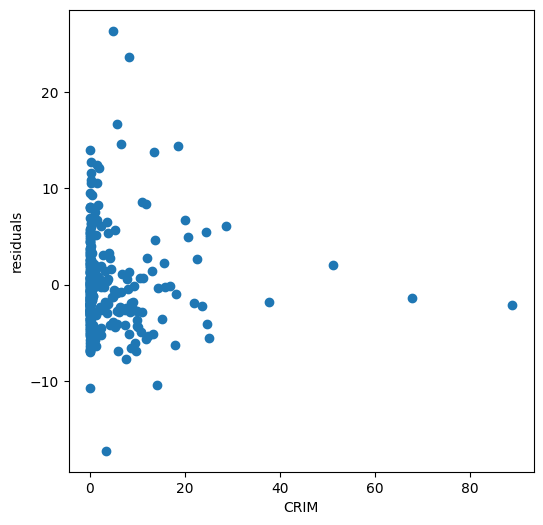

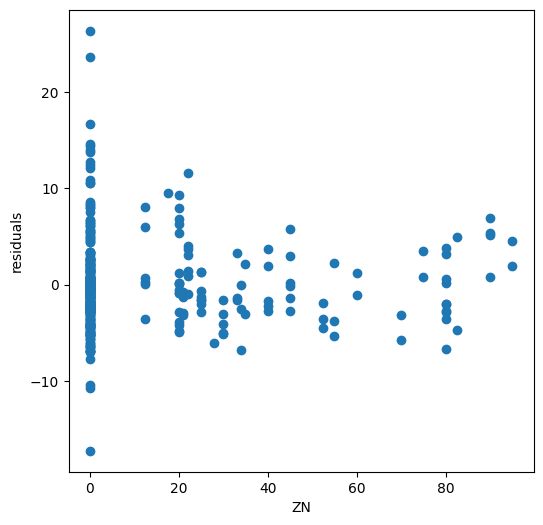

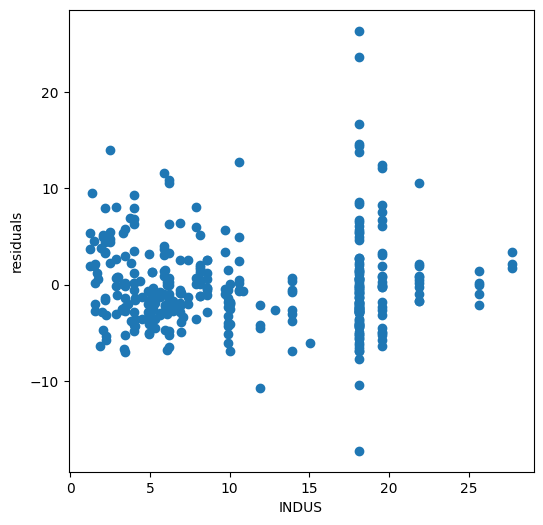

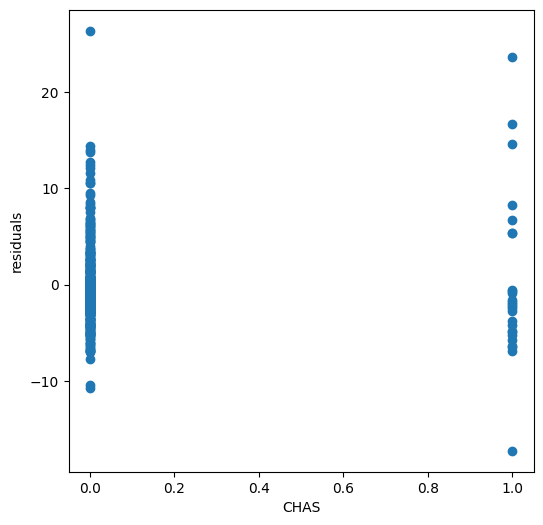

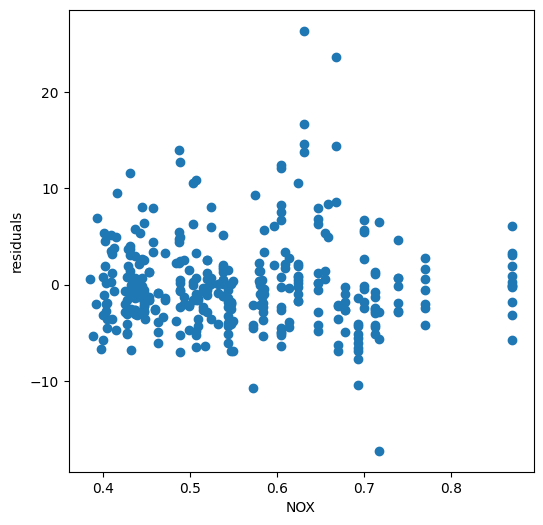

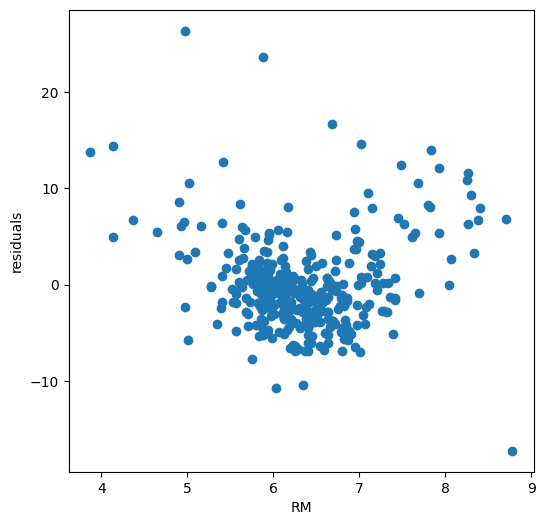

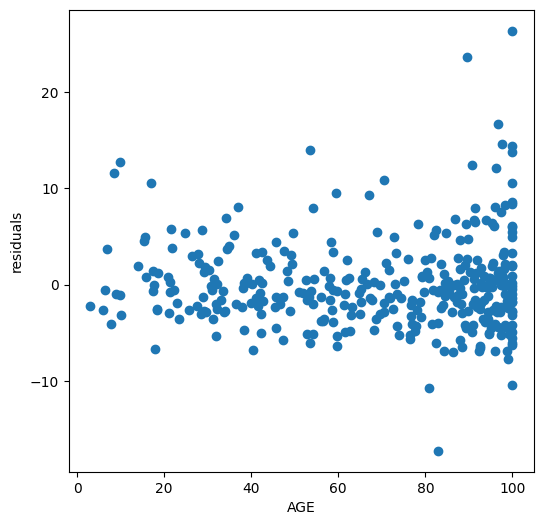

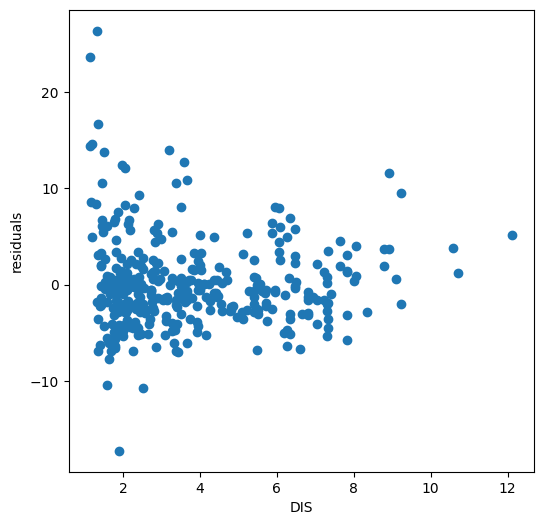

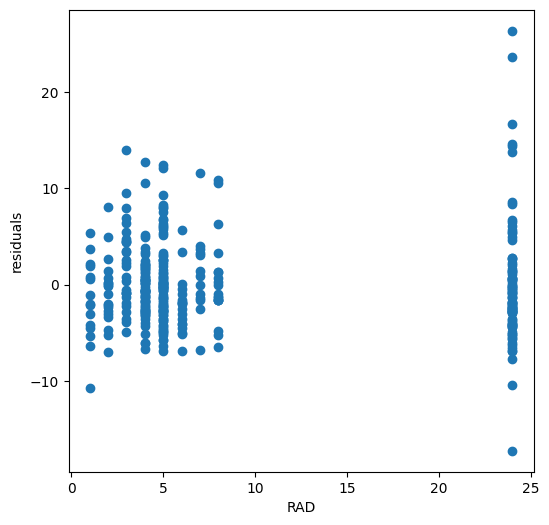

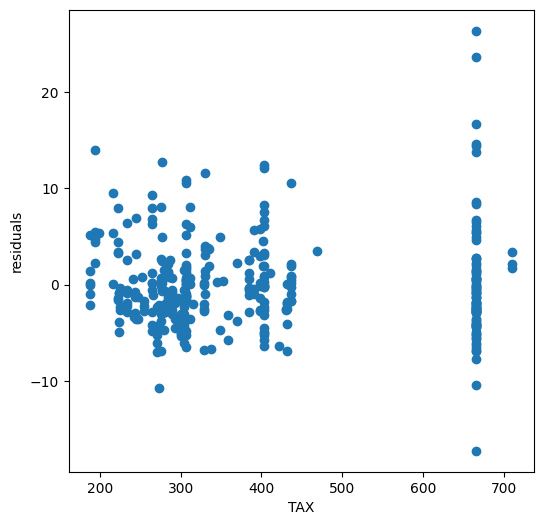

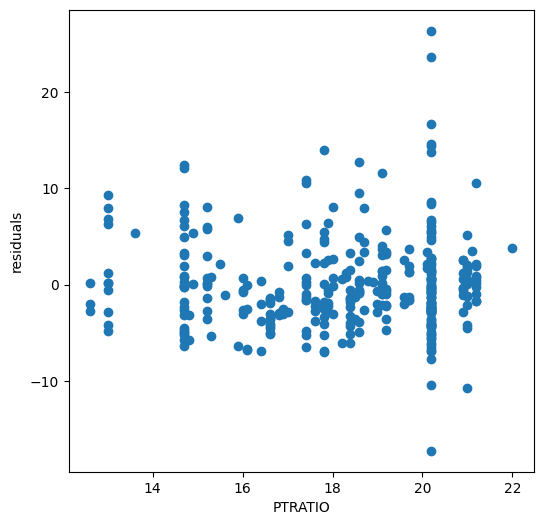

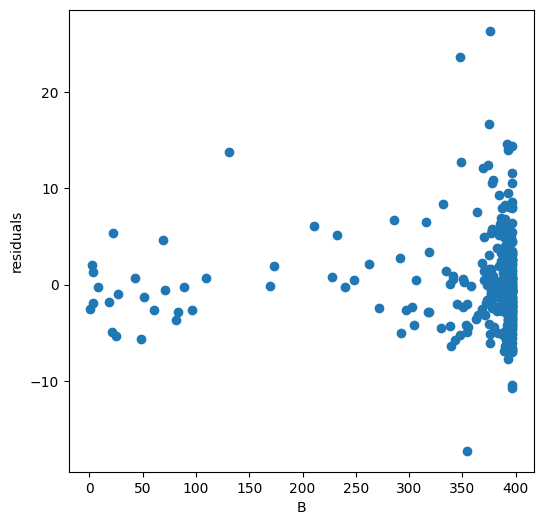

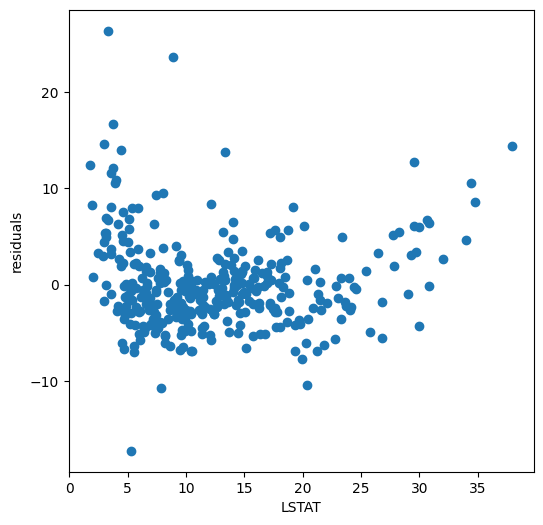

In [110]:
# residual plots for checking linear relationship to each independent variable, should be scattered randomly around 0.
figures = []
for column in X_test.columns:
    f = plt.figure(figsize=(6, 6))
    figures += [f]  # This appends a figure f to the list of figures
    ax = plt.axes()
    ax.scatter(X_train[column], residuals)
    # ax.hlines(y=0,xmin=0.0,xmax=1.0)
    plt.xlabel(column)
    plt.ylabel('residuals')

Text(0, 0.5, 'residuals')

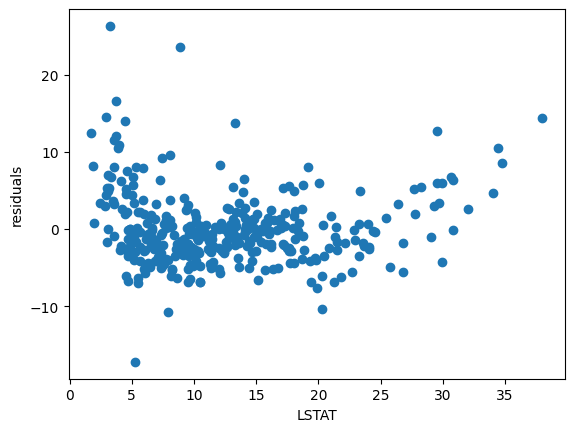

In [112]:
plt.scatter(X_train['LSTAT'], residuals)
plt.xlabel('LSTAT')
plt.ylabel('residuals')

In [34]:
# The coefficients
print("Coefficients: \n", pipe['model'].coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]
Mean squared error: 21.52
Coefficient of determination: 0.71


In [35]:
def print_metrics(coef, y_test, y_pred):
    # The coefficients
    print("Coefficients: \n", coef)
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

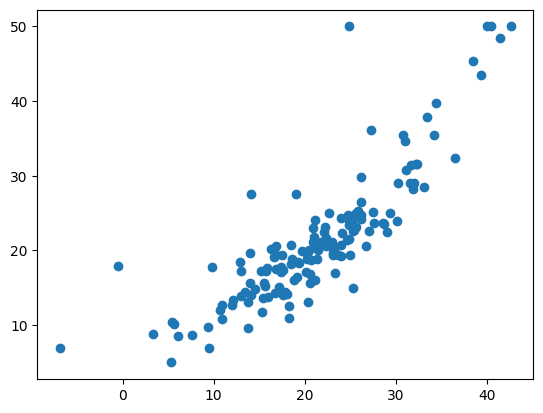

In [36]:
plt.scatter(y_pred, y_test)

In [37]:
import seaborn as sns

In [38]:
df.corr()  # correlation coefficients

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


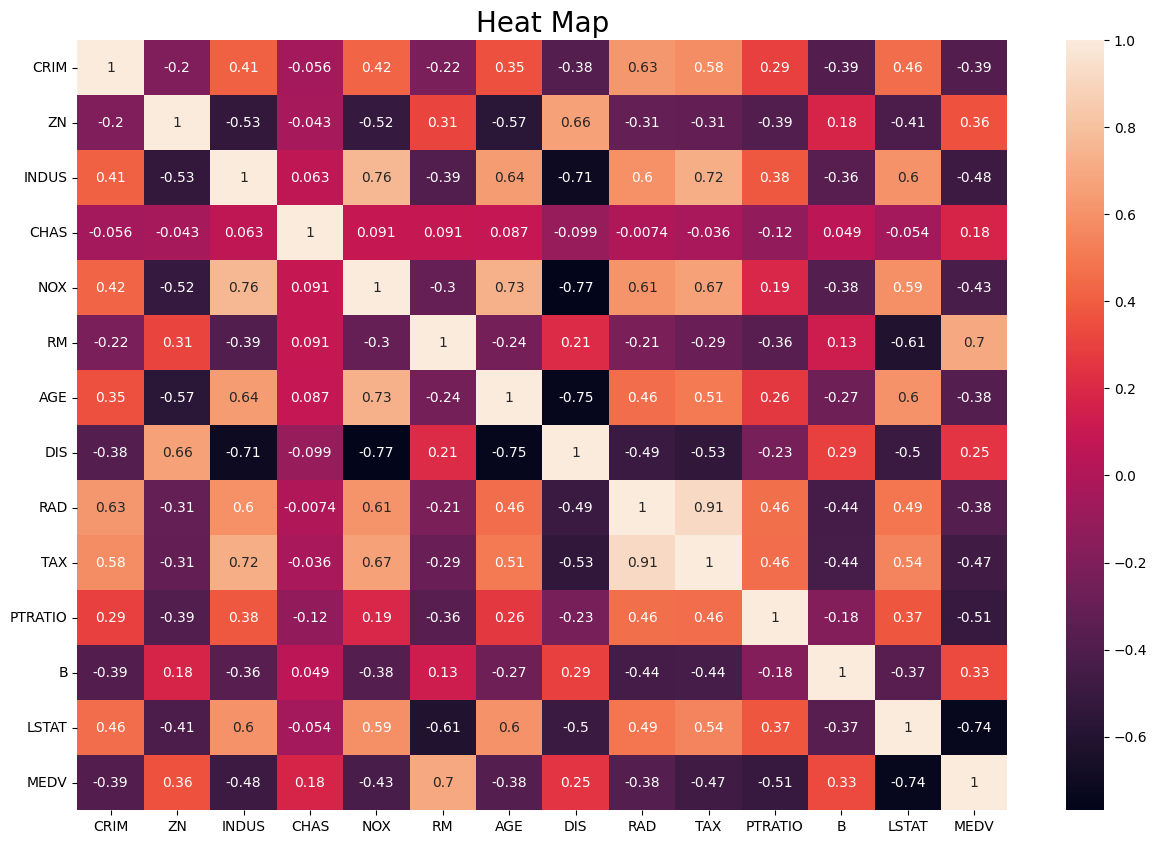

In [39]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)  # visualization of corrcoeff.
plt.title('Heat Map', size=20)
plt.yticks(rotation=0)
plt.show()

PART 2 with RIDGE regression

In [40]:
pipe_ridge = Pipeline([('scaler', StandardScaler()),
                       ('model', Ridge())])
pipe_ridge.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('model', Ridge())],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': Ridge(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__alpha': 1.0,
 'model__copy_X': True,
 'model__fit_intercept': True,
 'model__max_iter': None,
 'model__positive': False,
 'model__random_state': None,
 'model__solver': 'auto',
 'model__tol': 0.0001}

In [41]:
param_grid = {'model__alpha': [0.5, 1.0, 5.0, 10.0]}
grid = GridSearchCV(estimator=pipe_ridge,
                    param_grid=param_grid, verbose=2, cv=3)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...................................model__alpha=0.5; total time=   0.0s
[CV] END ...................................model__alpha=0.5; total time=   0.0s
[CV] END ...................................model__alpha=0.5; total time=   0.0s
[CV] END ...................................model__alpha=1.0; total time=   0.0s
[CV] END ...................................model__alpha=1.0; total time=   0.0s
[CV] END ...................................model__alpha=1.0; total time=   0.0s
[CV] END ...................................model__alpha=5.0; total time=   0.0s
[CV] END ...................................model__alpha=5.0; total time=   0.0s
[CV] END ...................................model__alpha=5.0; total time=   0.0s
[CV] END ..................................model__alpha=10.0; total time=   0.0s
[CV] END ..................................model__alpha=10.0; total time=   0.0s
[CV] END ..................................model_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [0.5, 1.0, 5.0, 10.0]}, verbose=2)

In [42]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003668,2.357189e-03,0.001334,4.716513e-04,0.5,{'model__alpha': 0.5},0.680880,0.781547,0.681720,0.714716,0.047258,4
1,0.002000,1.123916e-07,0.001000,4.899036e-07,1.0,{'model__alpha': 1.0},0.681204,0.781395,0.682010,0.714870,0.047042,3
2,0.002668,4.702465e-04,0.001333,4.702464e-04,5.0,{'model__alpha': 5.0},0.683170,0.779726,0.683502,0.715466,0.045439,1
3,0.002001,1.123916e-07,0.001000,2.973602e-07,10.0,{'model__alpha': 10.0},0.684698,0.777073,0.684081,0.715284,0.043692,2


In [43]:
grid.best_params_

{'model__alpha': 5.0}

In [44]:
param_grid = {'model__alpha': [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]}
grid = GridSearchCV(estimator=pipe_ridge,
                    param_grid=param_grid, verbose=2, cv=3)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ...................................model__alpha=2.0; total time=   0.0s
[CV] END ...................................model__alpha=2.0; total time=   0.0s
[CV] END ...................................model__alpha=2.0; total time=   0.0s
[CV] END ...................................model__alpha=3.0; total time=   0.0s
[CV] END ...................................model__alpha=3.0; total time=   0.0s
[CV] END ...................................model__alpha=3.0; total time=   0.0s
[CV] END ...................................model__alpha=4.0; total time=   0.0s
[CV] END ...................................model__alpha=4.0; total time=   0.0s
[CV] END ...................................model__alpha=4.0; total time=   0.0s
[CV] END ...................................model__alpha=5.0; total time=   0.0s
[CV] END ...................................model__alpha=5.0; total time=   0.0s
[CV] END ...................................model

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                          9.0]},
             verbose=2)

In [45]:
# best alpha (reg parameter) is 6.0, so retrain the model with that
grid.best_params_

{'model__alpha': 6.0}

In [46]:
pipe_ridge = Pipeline([('scaler', StandardScaler()),
                       ('model', Ridge(alpha=6.0))]).fit(X_train, y_train)

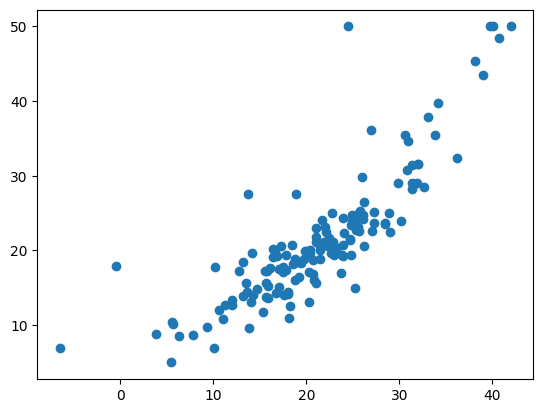

In [47]:
y_pred_2 = pipe_ridge.predict(X_test)
ridge_residuals = y_test-y_pred_2
plt.scatter(y_pred_2, y_test)

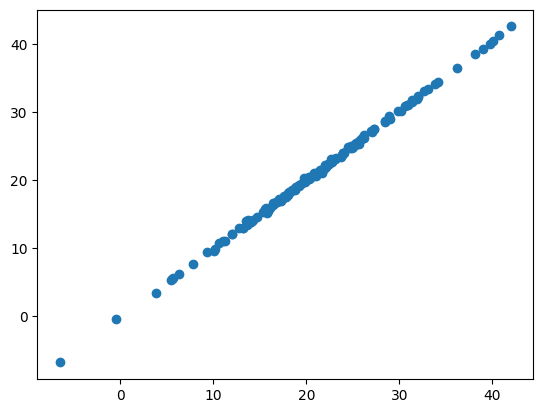

In [48]:
# the two models prediction seem nearly identical
y_pred = pipe.predict(X_test)
plt.scatter(y_pred_2, y_pred)

In [49]:
print_metrics(pipe_ridge['model'].coef_, y_test, y_pred_2)

Coefficients: 
 [-1.04294432  0.70484602  0.19836548  0.84203587 -1.60119986  2.94257354
 -0.31091924 -2.72030375  1.68632365 -1.10386223 -1.99051981  1.00784755
 -3.80163795]
Mean squared error: 21.70
Coefficient of determination: 0.71


Since the simple linear model and the one with L2 regularization produced almost identical results, I suspect it is due to weak multicollinearity

In [50]:
import numpy as np

In [51]:
corr_matrix = np.corrcoef(X, rowvar=False)
eigenvalues, _ = np.linalg.eig(corr_matrix)
eigenvalues

array([6.12684883, 1.43327512, 1.24261667, 0.85757511, 0.83481594,
       0.65740718, 0.53535609, 0.39609731, 0.06350926, 0.27694333,
       0.16930298, 0.18601437, 0.22023782])

In [55]:
min(y_pred_2)

-6.471418937429817

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
degrees = [2, 3, 4, 5, 6]  # Change degree "hyperparameter" here

In [ ]:
pipe_poly = Pipeline(steps=[
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', Ridge()),
])

search = GridSearchCV(
    estimator=pipe_poly,
    param_grid={'poly__degree': degrees,
                'model__alpha': [1.0, 2.0, 4.0, 5.0, 10.0]},
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=3
)

search.fit(X, y)
first = -search.cv_results_['mean_test_score']

In [70]:
search.best_params_

{'model__alpha': 4.0, 'poly__degree': 2}

In [71]:
pipe_poly_best_params = Pipeline(steps=[
    ('poly', PolynomialFeatures(include_bias=False, degree=2)),
    ('model', Ridge(alpha=4.0)),
]).fit(X_train, y_train)

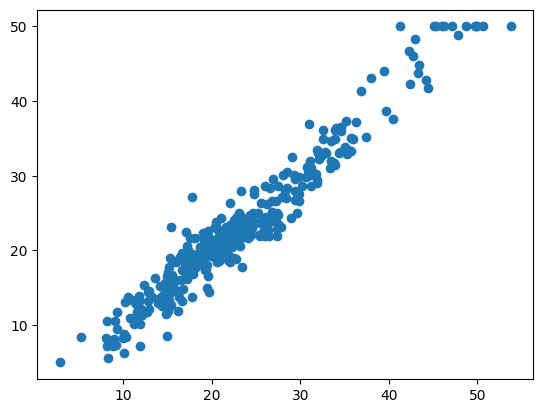

In [87]:
y_pred_poly = pipe_poly_best_params.predict(X_train)
y_pred_poly_test = pipe_poly_best_params.predict(X_test)
plt.scatter(y_pred_poly, y_train)

Coefficients: 
 [-3.69989623e-01 -6.12213738e-02 -7.44153693e-01  7.37376113e-02
  6.19791298e-02  8.71480679e-01  4.51120935e-01  1.54375055e-01
  7.21592043e-01  6.12847860e-02 -7.56726524e-01  2.42115514e-01
 -1.20469681e+00  1.84174796e-03  8.03570899e-03  4.30110075e-01
  2.72876915e+00 -1.22387318e+00  1.79018470e-01  2.26476923e-03
  1.43682811e-01  4.33103038e-01 -3.67747294e-02  2.62986729e-01
 -5.28032475e-04  2.89841186e-02  6.13104806e-04  5.43796361e-03
 -4.95359189e-02  2.61683275e-01 -6.65743278e-03  4.00360608e-04
 -1.58671763e-02 -1.57609566e-02  4.73587525e-04  6.26584153e-03
 -3.31827349e-04 -8.61722748e-03  2.97421666e-02 -3.34517760e-01
  9.13427274e-02  7.66824856e-02  4.88858869e-03  2.66371004e-02
  1.02188950e-02  8.51258179e-04 -7.21931992e-02  9.16176702e-04
 -2.77732354e-02  7.37376113e-02 -2.91238677e-01 -3.58168385e+00
 -4.36480500e-02 -1.41445083e+00  2.12781282e-02 -1.78373629e-02
 -1.80754495e-01  1.25642424e-01 -6.36194632e-01  6.15171157e-03
  5.45287

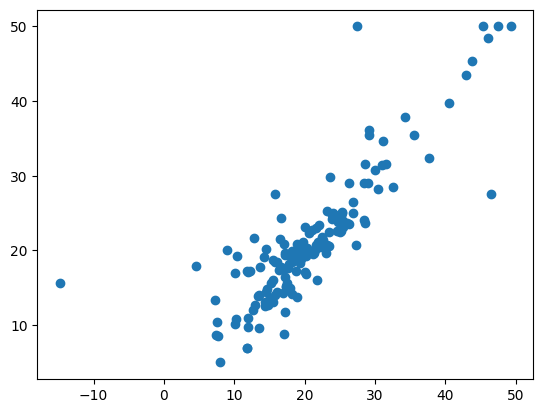

In [88]:
plt.scatter(y_pred_poly_test, y_test)
print_metrics(pipe_poly_best_params['model'].coef_, y_test, y_pred_poly_test)

In [80]:
print_metrics(pipe_poly_best_params['model'].coef_, y_train, y_pred_poly)

Coefficients: 
 [-3.69989623e-01 -6.12213738e-02 -7.44153693e-01  7.37376113e-02
  6.19791298e-02  8.71480679e-01  4.51120935e-01  1.54375055e-01
  7.21592043e-01  6.12847860e-02 -7.56726524e-01  2.42115514e-01
 -1.20469681e+00  1.84174796e-03  8.03570899e-03  4.30110075e-01
  2.72876915e+00 -1.22387318e+00  1.79018470e-01  2.26476923e-03
  1.43682811e-01  4.33103038e-01 -3.67747294e-02  2.62986729e-01
 -5.28032475e-04  2.89841186e-02  6.13104806e-04  5.43796361e-03
 -4.95359189e-02  2.61683275e-01 -6.65743278e-03  4.00360608e-04
 -1.58671763e-02 -1.57609566e-02  4.73587525e-04  6.26584153e-03
 -3.31827349e-04 -8.61722748e-03  2.97421666e-02 -3.34517760e-01
  9.13427274e-02  7.66824856e-02  4.88858869e-03  2.66371004e-02
  1.02188950e-02  8.51258179e-04 -7.21931992e-02  9.16176702e-04
 -2.77732354e-02  7.37376113e-02 -2.91238677e-01 -3.58168385e+00
 -4.36480500e-02 -1.41445083e+00  2.12781282e-02 -1.78373629e-02
 -1.80754495e-01  1.25642424e-01 -6.36194632e-01  6.15171157e-03
  5.45287

As clearly seen, the polynomial features have overfit the data, since the polynomialfeatures preprocessor generates polynomial and interaction terms for every independent variable. We have to choose which variables need polynomial terms based on the residual plots(or subject-area research). If non-randomness can be identifyed in the error term, the independent variables are not explaining everything that they can. The residuals should be scattered around zero with constant variance (no heteroscedascticity).

Note to self: try quantiletransformer(non-linear transformer) for outliers.

In [116]:
# adding a polynomial term from the independent variable LSTAT
X_train['polyf'] = (X_train['LSTAT']**2.)

In [118]:
X_test['polyf'] = (X_test['LSTAT']**2.)

In [121]:
newpipe = Pipeline([('scaler', StandardScaler()),
                    ('model', LinearRegression())
                    ]).fit(X_train, y_train)

In [126]:
y_prednew_train = newpipe.predict(X_train)
print_metrics(newpipe['model'].coef_, y_train, y_prednew_train)
y_prednew_test = newpipe.predict(X_test)
print_metrics(newpipe['model'].coef_, y_test, y_prednew_test)

Coefficients: 
 [ -1.26891413   0.45354395   0.46936439   0.6797533   -1.63400484
   2.21410405   0.30216743  -2.52292464   2.16332539  -1.44088477
  -1.79296392   0.82203254 -12.52277005   7.93985018]
Mean squared error: 18.46
Coefficient of determination: 0.79
Coefficients: 
 [ -1.26891413   0.45354395   0.46936439   0.6797533   -1.63400484
   2.21410405   0.30216743  -2.52292464   2.16332539  -1.44088477
  -1.79296392   0.82203254 -12.52277005   7.93985018]
Mean squared error: 16.88
Coefficient of determination: 0.77


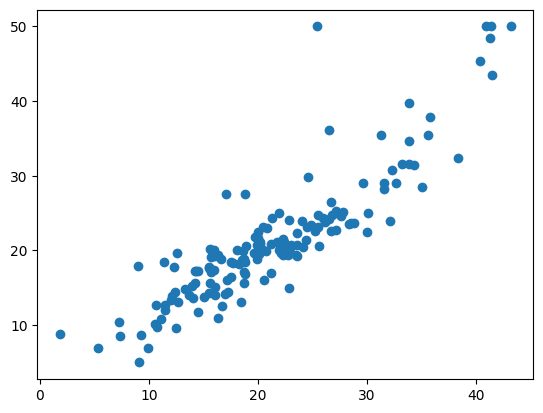

In [127]:
plt.scatter(y_prednew_test, y_test)

As we can see R-squared increased significantly by adding just one polynomial term for the variable LSTAT, and the model doesnt overfit either. We should continue looking at other variables, and possible interaction terms, but naming is starting to get hard. We should also calculate adjusted R-squared, since R-squared increases with every added variable.